## SEGMENTATION DE LA CLIENTELE D'UNE ENTREPRISE AVEC PYTHON PAR DES ALGORITHME DE MACHINE LEARNING NON SUPERVISE

## Etapes du projet

- Tâche 1 : Introduction (cette section)
- Tâche 2 : Analyse exploratoire des données
- Tâche 3 : Analyse en composantes principales
- Tâche 4 : Clustering K-Means avec la méthode du coude

## Tache 1: Introduction

Dans ce projet, nous apprendrons à anlyser un ensemble de données de transactions clients afin d'interpréter le comportement des clients d'un fournisseur.

### Prérequis

Connaissance de base de Python (par exemple, NumPy et Pandas, Matplotlib, Seaborn);
- Compréhension de base de l'apprentissage automatique (ce qu'est la réduction de dimensionnalité, par exemple).

### Segmentation des données : Définition

- Le mot technique dans le jargon du Machine Learning utilisé pour désigner la segmentation des données est : Clustering.

## Tache 2: Analyse exploratoire des données | Segmentation de la clientèle avec Python

### Importation des librairies/fonctions et des données

In [2]:
# Libairies/fonctions nécessaires

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn. preprocessing import StandardScaler

from sklearn. decomposition import PCA, KernelPCA

from scipy.stats import pearsonr

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

Les données que nous utiliserons dans ce projet guidé proviennent de UCI Machine Learning. L'ensemble de données comprend les dépenses annuelles pour différents types de produits de vente au détail (par exemple surgelés, épicerie, épicerie fine, etc.)

In [4]:
# Importation des données

file = "https://raw.githubusercontent.com/JosueAfouda/Segmentation-de-client-le-dans-Python/main/Wholesale%20customers%20data.csv"

df = pd.read_csv(file)

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Consultez la documentation sur les données afin de bien comprendre la signification des variables :

https://archive.ics.uci.edu/ml/datasets/Wholesale+customer

In [6]:
# type de distribution 

df['Channel'].value_counts()   # Channel = aux canneaux

# ici nous avons deux modalitées 1 et 2

1    298
2    142
Name: Channel, dtype: int64

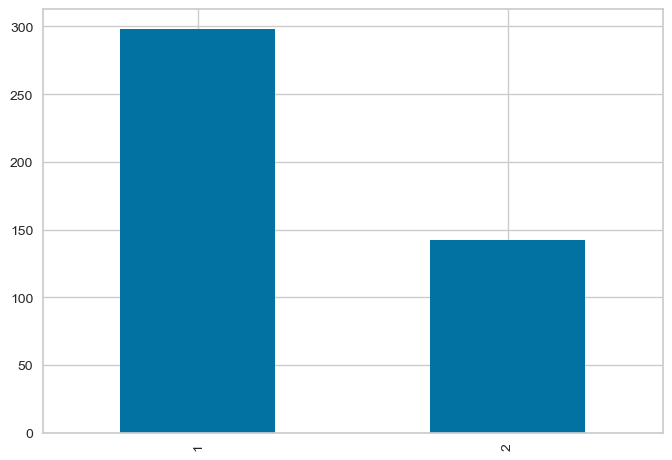

In [7]:
# type de distribution 

df['Channel'].value_counts(). plot(kind='bar');

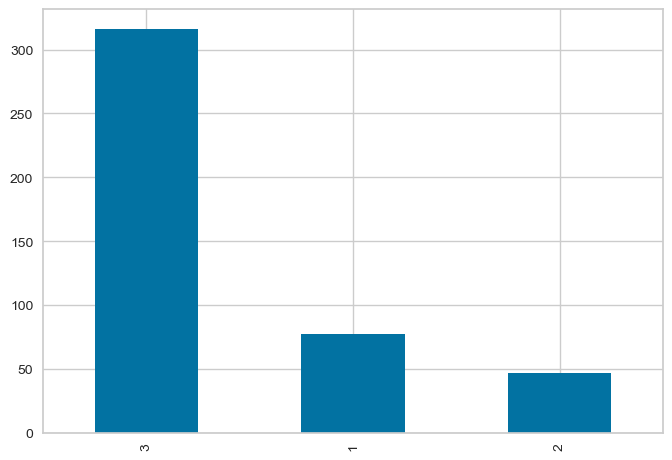

In [8]:
# La Région des clients

df['Region'].value_counts(). plot(kind='bar');

In [9]:
# Quelque Changement de nom de varaiables et de modalitées

df = df.rename(columns={'Delicassen': 'Delicatessen'})   # Delicatessen = épicerie fine

df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'})  # Retail = vente au detail

df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other'})   # Other = autre

# La fonction map() permet de remplacer les elements d'une variable par de nouveau elements 

In [10]:
# Table de frequence de la variable "Region"

df['Region'].value_counts()

Other     316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [11]:
# Table de frequence de la variable "Region" Normaliséé

df['Region'].value_counts(normalize = True)

Other     0.718182
Lisbon    0.175000
Porto     0.106818
Name: Region, dtype: float64

In [12]:
# Stockage des noms des colonnes dans une liste

features = df.columns
features

# On obtien un Index, donc il faut ajouter la methode .tolist()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [13]:
# Stockage des noms des colonnes dans une liste

features = df.columns.tolist()
features

# Ici nous avons ajouter la methode .tolist() pour obtenir notre liste

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [14]:
# Afficher le résumé statistique

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [16]:
# Sauvegarde de df au format csv

df.to_csv("data_preprocess_csv")

# Cette methode .to_csv() permet de sauvegarder les données qu'on a nétoyé en amons. Le fichier csv netoyé va 
# directement dans notre fichier de l'ordinateur

In [17]:
# Importation du fichier csv "data_preprocess_csv" que nous avons sauvegarder

df = pd.read_csv('data_preprocess_csv')
df.head()

,Unnamed: 0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,Retail,Other,12669,9656,7561,214,2674,1338
1,1,Retail,Other,7057,9810,9568,1762,3293,1776
2,2,Retail,Other,6353,8808,7684,2405,3516,7844
3,3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,4,Retail,Other,22615,5410,7198,3915,1777,5185


In [18]:
# Importation du fichier csv "data_preprocess_csv" que nous avons sauvegarder

df = pd.read_csv('data_preprocess_csv', index_col = 0)
df.head()

# L'argument index_col = 0 permet de suprimer la première colonne "Unnamed: 0" qui ne sert a rien 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [19]:
# Pour avoir la structure de la dataframe

df.info()

# il n'y a pas de valeur manquante dans les données

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


### VISUALISATION DES DONNEES 

In [20]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

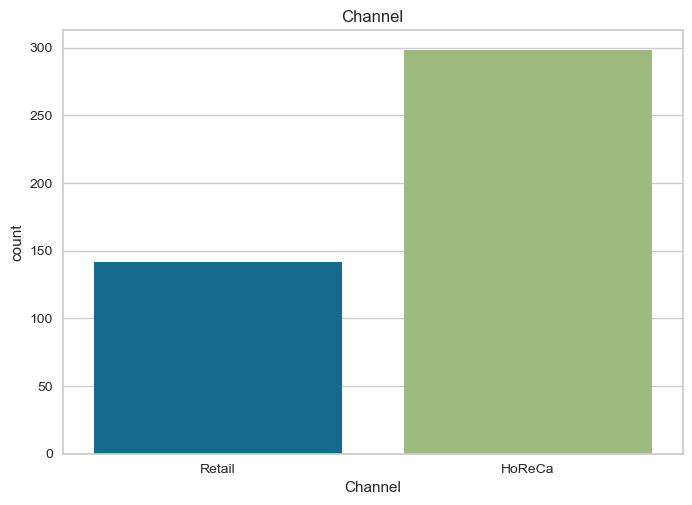

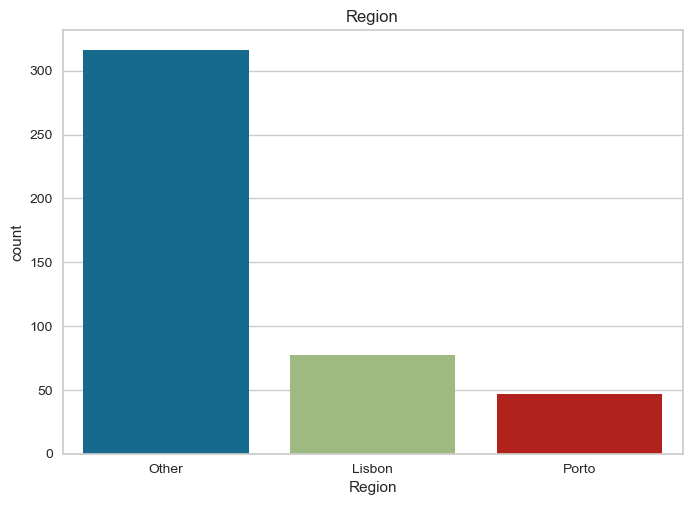

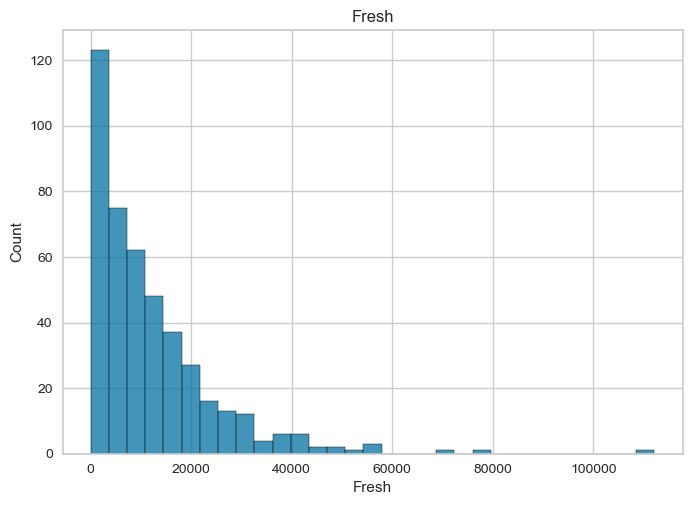

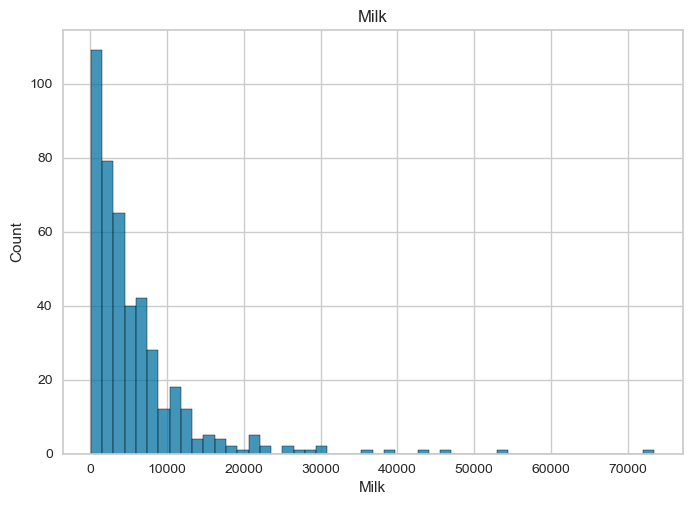

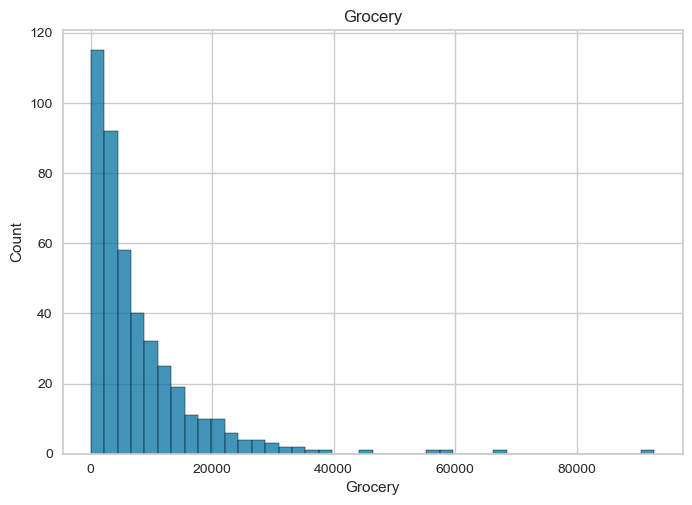

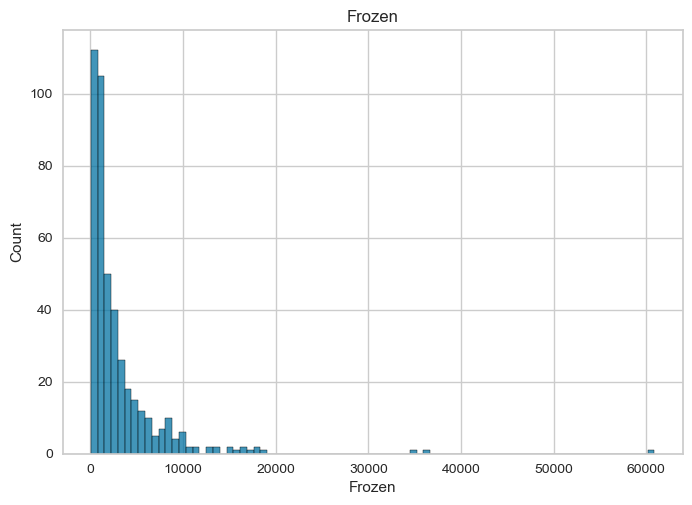

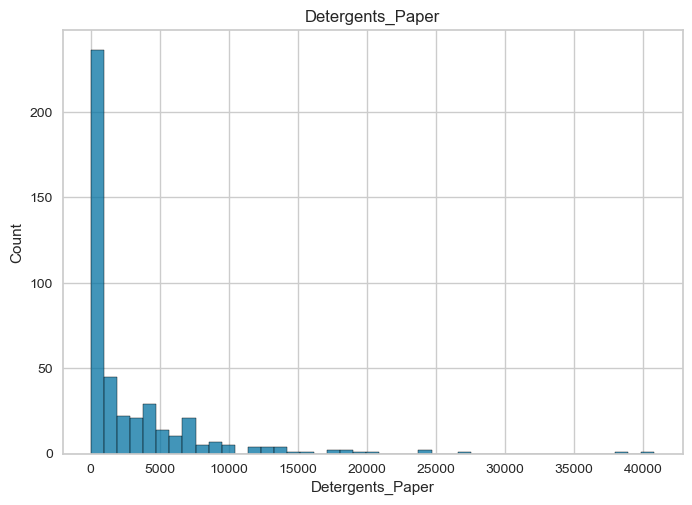

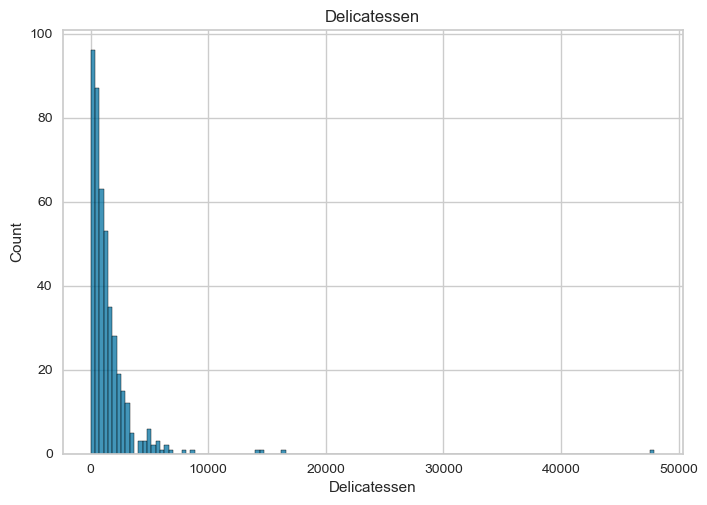

In [53]:
# Diagrammes à barres et Histogrammes

for feature in features:
    if (feature == 'Channel') | (feature == 'Region'):  
        sns.countplot(df[feature]).set_title(feature)
        plt.show()
    else:
        sns.histplot(df[feature]).set_title(feature)
        plt.show()
        
# Nous avons deux variables qualitatives discretes qui sont "Channel" et "Region". on a utilisé la boucle FOR avec la condition
# Si nos deux variables discretes "Channel" et "Region" affiche Diagrammes à barres  
# Si non des Histogrammes pour le reste de nos variable quantitative

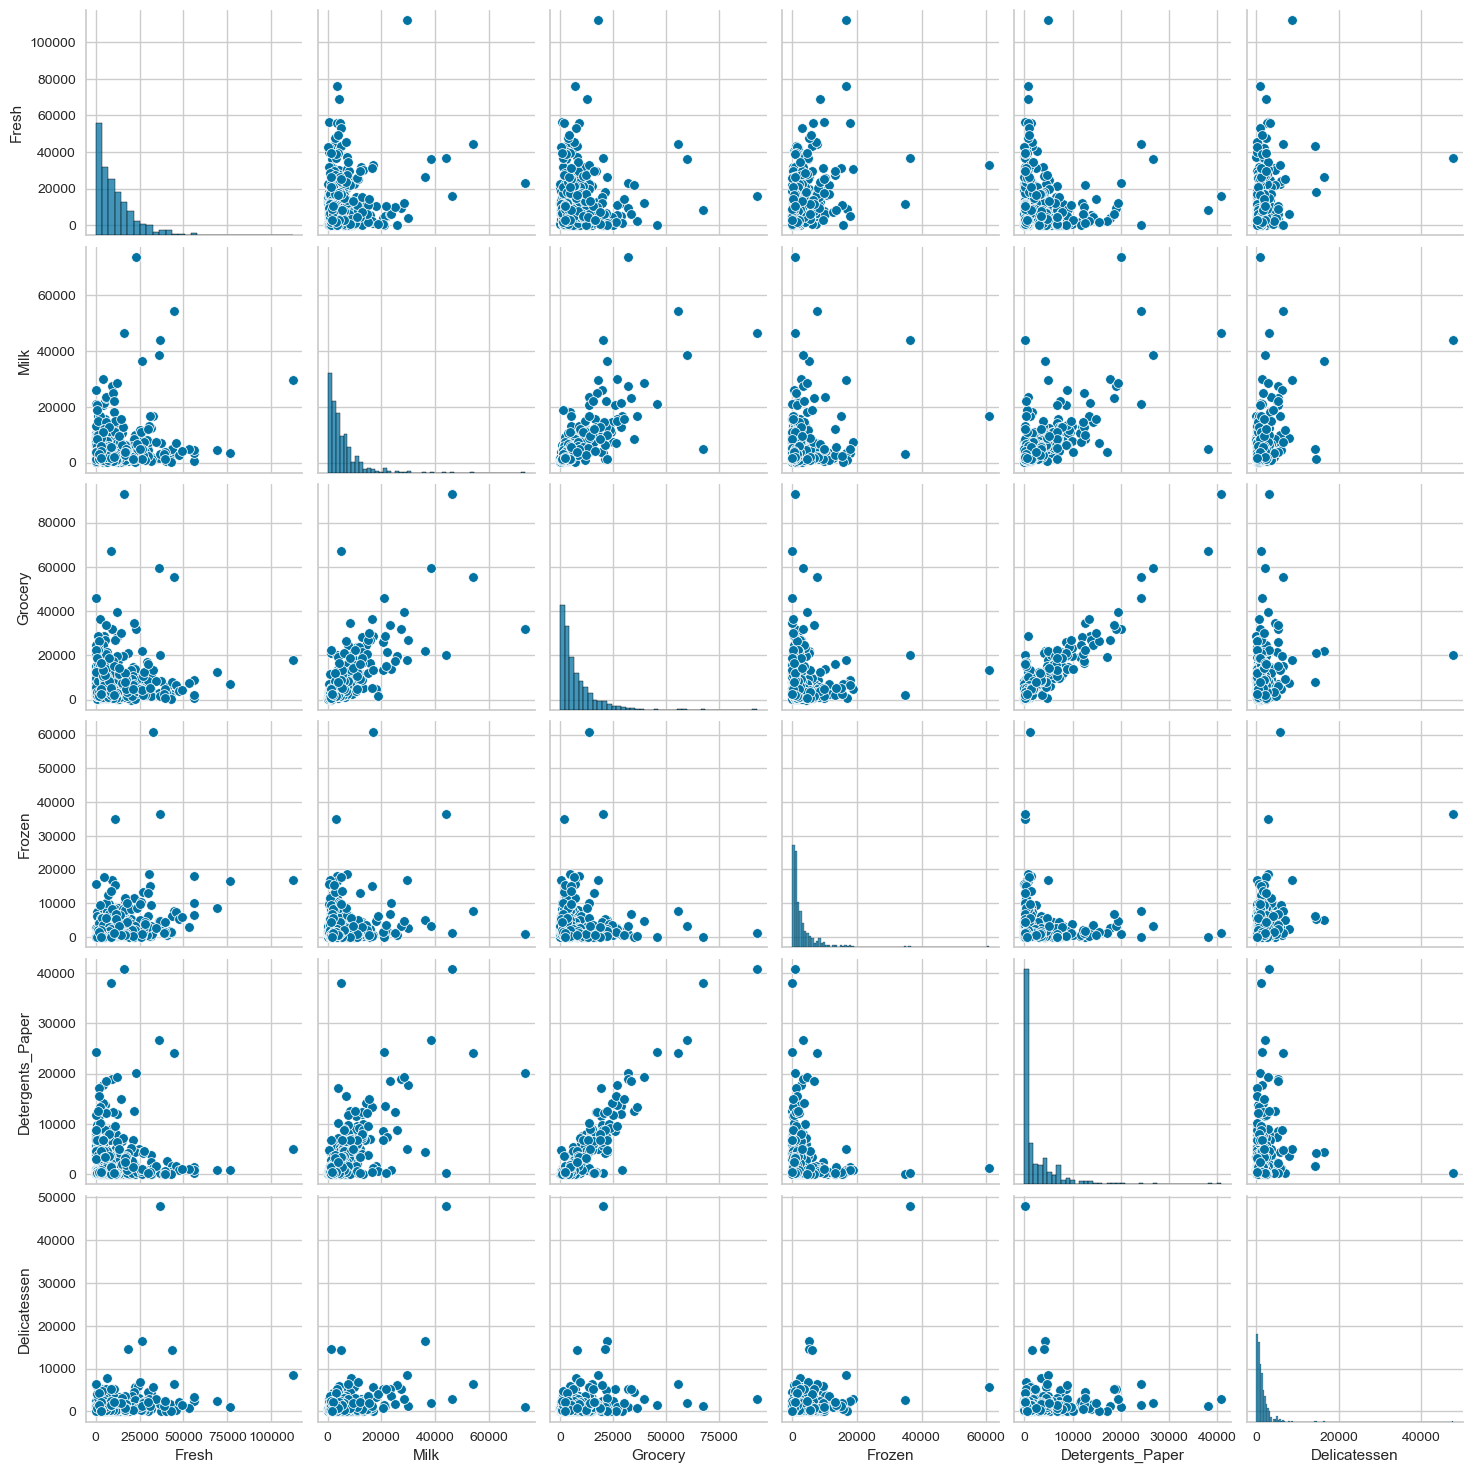

In [22]:
# Matrice de visualisation ou encore Matrice de graphique

sns.pairplot(df);

# Ce code nous permet de voir les differentes corrélation de nos variables avant d'approfondir nos recherch es

## Tache 3:  ANALYSE EN COMPOSANTE PRINCIPAL (ACP)

### ACP linéaire

L'ACP (Principal Component Analysis (PCA)) est certainement la technique de réduction de dimensionnalité la plus utilisée. Elle est simple, facile à implémenter et donne de bons résultats. Nous allons réduire la dimension de la dataframe df à 2 composantes pincipales afin de pouvoir visualiser le résultat dans un plan (2D).

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HoReCa,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [24]:
# Affichons uiquement les variables numeriques de la dataframe df

data = df.drop(['Channel','Region'], axis = 1)
data.head()

# nous avons suprimer les deux variables qualitatives ['Channel'], ['Region']

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [25]:
# standardisation des données pour un bon resultat

scaler = StandardScaler()    # On appel la methode standarScaler() de Sklearn

data = scaler.fit_transform(data)   # la methode fit_transform() pour transformer notre dataframe

type(data)    # On affiche le type. nous allons voir que c'est un tableau Numpy


# la standardisation des données est d'assurer une interopérabilité (le partage) optimale des données entre elles, 
# en vue de leur exploitation marketing et connaissance client.

numpy.ndarray

In [26]:
# Affichage de data

data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [27]:
# Sauvegarde du tableau Numpy data

np.save('training_data.npy', data)

# Nous avons sauvegarder le tableau numpy dans notre fichier d'ordinateur

In [28]:
# Application de l'ACP (2 composantes)

pca = PCA(n_components = 2)   # je fais appel a la classe PCA de Sklearn et comme argument n_components égale 2
                                  # pour nous permettre de visualiser en 2 dimension

results_pca = pca.fit_transform(data)  # J'applique le fit_transform() et je nomme mon objet resultat result_pca

type(results_pca)    # On affiche le type. nous allons voir que c'est un tableau Numpy

numpy.ndarray

In [29]:
# Affichage du resultat

results_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

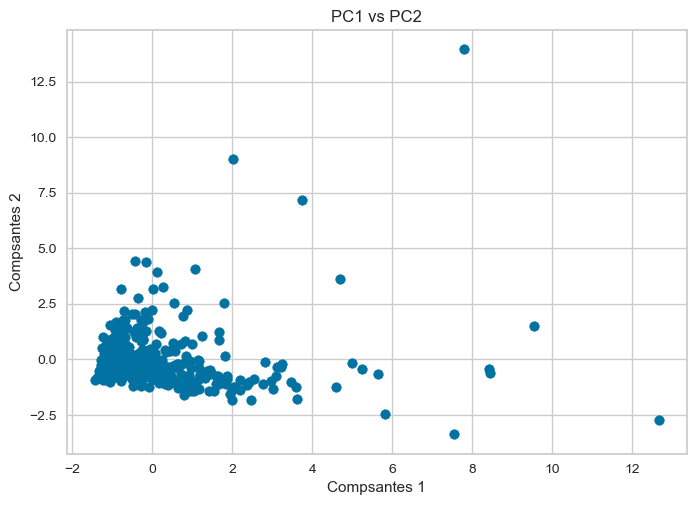

In [30]:
# Visualisation des composantes principales

plt.scatter(results_pca[:, 0], results_pca[:, 1])   # je lui dis de me prendre la première composante d'indice 0 
                                                       # et la deuxième d'indice 1. car en python on compte à partir de 0
plt.xlabel('Compsantes 1')
plt.ylabel('Compsantes 2')
plt.title('PC1 vs PC2')
plt.show()

In [31]:
# Coéfficient de corrélation de pearson obtenu apres l'ACP

pearsonr(results_pca[:, 0], results_pca[:, 1])    # [0] on le met juste apres pour obtenur que la statistique de pearson

PearsonRResult(statistic=-3.0531133177191805e-16, pvalue=1.0000000000001221)

La statistique de test du Coefficient de corrélation de Pearson obtenue après l'ACP est de -3.0531133177191805e-16, ce qui indique une faible corrélation entre les composants. De plus, la p-valeur associée à cette statistique est de 1.0000000000001221, ce qui suggère que cette corrélation n'est pas statistiquement significative.

- L'interet de faire une analyse en composante linéaire (ACP) est de décolorré les variables , les composantes principales seront decolorrés. cela casse la Colinéarité

### ACP non-linéaire

L'ACP non-linéaire, contrairement à l'ACP linéaire, permet de faire une réduction non-linéaire de dimensionnalité. Nous utiliserons l'algorithme (Kernel Principal Component Analysis (KPCA)) de Sklearn.

Les noyaux possibles sont : 'linear', 'poly, 'rbf,' sigmoid', 'cosine', 'precomputed'. Silenoyeauest 'linear', alors on a une ACP normale.

Régarder les definitions des noyaux SKlearn , tres important

In [32]:
# Chargement des données numpy d'entrainement précédement sauvegrdé: "training_data.npy"

data = np.load('training_data.npy')
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [33]:
# KPCA avec noyaux 'rbf'

kpca = KernelPCA(n_components = 2, kernel = 'rbf')  # je fais appel a kpca et le noyaux je prends "rbf"

results_kpca_rbf = kpca.fit_transform(data)  # J'applique le fit_transform() et je nomme mon objet resulta result_kpca_rbf

type (results_kpca_rbf)    # On affiche le type. nous allons voir que c'est un tableau Numpy

numpy.ndarray

In [34]:
results_kpca_rbf

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

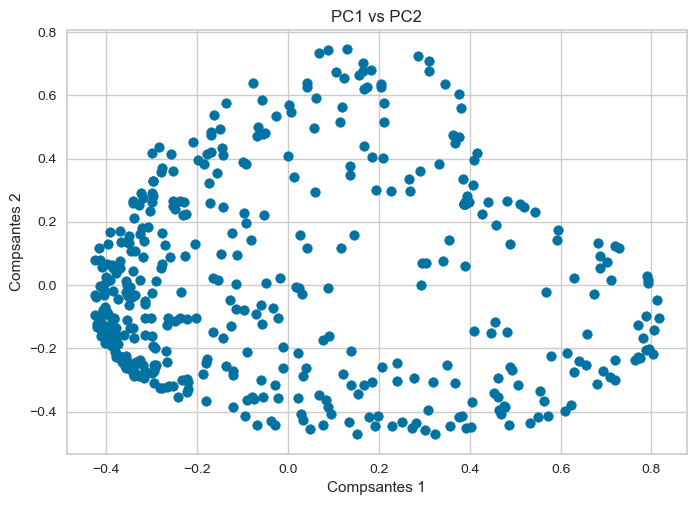

In [35]:
# Visualisation du nuage de point des deux composantes

plt.scatter(results_kpca_rbf[:, 0], results_kpca_rbf[:, 1])   # je lui dis de me prendre la première composante d'indice 0 
                                                       # et la deuxième d'indice 1. car en python on compte à partir de 0
plt.xlabel('Compsantes 1')
plt.ylabel('Compsantes 2')
plt.title('PC1 vs PC2')
plt.show()

Ce nuage de point ACP non-linéaire comparé au nuage de point ACP linéaire, de base tous les données ne sont pas linéairements séparables.
Ici les données sont répartir de manière aléatoire, elles sont decolorré ici par rapport au premier nuage de point.

la methode de l'ACP non-linéaire presente un bon resultat avec un bon graphique, meme si le coéfficient de corrélation dit le contraire. ca c'est un autre debat

In [36]:
# Coéfficient de corrélation de pearson obtenu apres KPCA(kernel = 'rbf')

pearsonr(results_kpca_rbf[:, 0], results_kpca_rbf[:, 1])    # [0] on le met juste apres pourb obtenur que la statistique 

PearsonRResult(statistic=1.3877787807814457e-17, pvalue=1.0000000000001332)

Le coefficient de corrélation entre les deux composantes PC1 et PC2 obtenues à partir de la technique KPCA avec un noyau RBF de l'ACP non-linéaire est de 0.0, avec une p-valeur de 1.0000000000001332. Cela indique qu'il n'y a pas de corrélation linéaire significative entre ces deux variables. la p-valeur très élevée (1.0000000000001332) indique que cette absence de corrélation est très significative et peu susceptible d'être due au hasard. Cependant, cela ne signifie pas nécessairement qu'il n'y a pas de relation non linéaire entre les variables, qui pourrait être explorée à l'aide d'autres techniques d'analyse de données non linéaires.

In [37]:
# Comparaison des Coéfficient de corrélation de pearson

pearsonr(results_kpca_rbf[:, 0], results_kpca_rbf[:, 1])[0] < pearsonr(results_pca[:, 0], results_pca[:, 1])[0]

False

Ici le coéfficient de de corrélation de pearson de KPCA non-linéaire n'est pas inferieur au coéfficient de de corrélation de pearson de PCA linéaire. Mais plus tot superieur

Pour la réduction polynomiale (kernel = 'poly), n'oubliez pas de spécifier le degré du polynôme en utilisant l'argument degree au niveau de la fonction

KernelPCA (Par exemple degree = 2 pour un polynôme du second degré).

### Nous allons continué avec les donnéés de l'ACP non-linéaire 

In [38]:
# Ajout des composantes principales comme colonnes

df['x_kpca_rbf'] = results_kpca_rbf[:, 0]
df['y_kpca_rbf'] = results_kpca_rbf[:, 1]

In [39]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


## Tache 4: Clustering K-Means avec la methode coude

Dans cette session nous allons implementer un clustering en utilisant l'algorithme K-Means

lire la documentation de K-Means c'est tres important

In [40]:
# Clustering avec 5 clusters

clusters_model = KMeans(n_clusters = 5)
clusters_model.fit(results_kpca_rbf)
clusters = clusters_model.predict(results_kpca_rbf)

In [41]:
clusters

array([4, 4, 3, 0, 3, 4, 1, 4, 1, 2, 4, 1, 3, 2, 3, 1, 4, 1, 3, 4, 0, 1,
       3, 3, 3, 4, 1, 1, 2, 3, 0, 1, 0, 3, 1, 4, 3, 2, 2, 3, 3, 0, 2, 2,
       4, 2, 2, 3, 4, 2, 1, 4, 3, 2, 0, 1, 3, 2, 1, 4, 4, 3, 4, 2, 1, 3,
       4, 2, 1, 1, 0, 3, 0, 0, 4, 0, 1, 2, 1, 1, 1, 2, 4, 0, 1, 3, 3, 3,
       0, 0, 1, 0, 3, 3, 2, 1, 4, 1, 1, 0, 2, 2, 4, 3, 1, 0, 4, 2, 4, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 4, 3, 3, 0, 3, 4, 3, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 0, 3, 3, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 4,
       1, 2, 2, 0, 4, 2, 4, 1, 0, 2, 4, 2, 4, 1, 1, 1, 2, 2, 4, 2, 1, 4,
       3, 1, 1, 1, 4, 3, 2, 3, 1, 1, 1, 4, 2, 2, 0, 1, 1, 2, 1, 0, 3, 4,
       1, 1, 2, 2, 3, 1, 1, 2, 1, 4, 4, 2, 0, 3, 1, 4, 4, 2, 2, 0, 2, 1,
       0, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 4, 0, 1, 0, 1, 1, 0, 1, 3, 3, 0,
       0, 1, 4, 2, 1, 1, 1, 1, 1, 3, 0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 0, 1,
       2, 3, 2, 0, 2, 0, 1, 1, 4, 3, 1, 1, 3, 3, 0, 4, 1, 4, 3, 3, 3, 3,
       1, 0, 0, 3, 1, 1, 1, 2, 0, 1, 0, 4, 4, 1, 1,

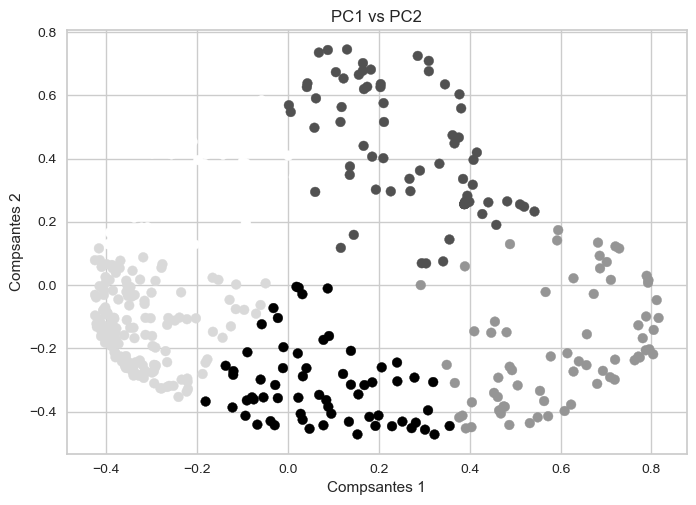

In [42]:
# Visualisation des clusters

plt.scatter(results_kpca_rbf[:, 0], results_kpca_rbf[:, 1], c = clusters) # pour affich les clusters on ajoute c=clusters    
                                                                         # je lui dis de me prendre la première composante
plt.xlabel('Compsantes 1')                                                 # d'indice 0 et la deuxième d'indice 1.
plt.ylabel('Compsantes 2')                                                   # car en python on compte à partir de 0
plt.title('PC1 vs PC2')
plt.show()

##### La question a se posé est pourquoi choisir 5 comme nombre de Clusters ?
##### pour determiner le nombre de Clusters à choisir nous allons utiliser la methode du Coude. avant il faut le packege yellowbrick

In [43]:
# Installation de yellowbrick

# taper sur un moteur de recherche (anaconda yellowbrick) ensuite copie coller le code en bas des mis à jour, puis aller 
# dans Anaconda prompt et coller le code puis tapé sur entré. laisser l'ordinateur faire le codage. en suite appuyé 
# sur y et entré et le tout est bon

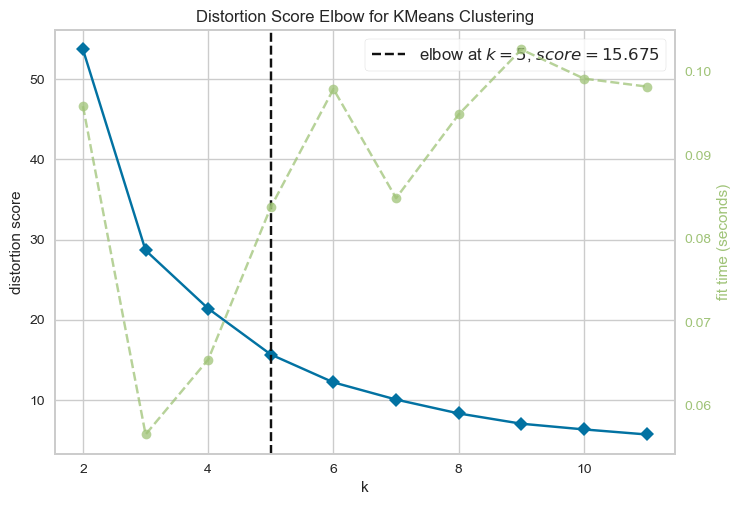

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# Methode du coude

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k = (2, 12))

visualizer.fit(results_kpca_rbf)

visualizer.show()

In [45]:
# Ajout des clusters à la dataframe df et sauvegarder au format CSV

df['clusters_kpca_rbf'] = clusters

df.to_csv('data_with_clusters.csv')

# Nous avons sauvegarder dataframe avec les clusters dans notre fichier d'ordinateur

Passons maintenent à l'analyse des resultats de segmentation

In [46]:
# Chargement des données 

df_final = pd.read_csv('data_with_clusters.csv', index_col = 0)  # index_col = 0 pour suprimer la 1ère colonne qui ne sert a rien

In [47]:
# Cinq premièere observation

df_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca_rbf,y_kpca_rbf,clusters_kpca_rbf
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,4
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,4
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,3
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,0
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,3


In [48]:
df_final['clusters_kpca_rbf'].unique()

# On a 5 groupe distict numeroté 3, 0, 4, 1, 2
# Chaque clusters à un representant dont les caracteristiques ne sont rien d'autre que les caracteristique
# moyenne du groupe. 

array([4, 3, 0, 1, 2], dtype=int64)

In [49]:
features   # la liste des colonnes que nous avons créée au debut

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [50]:
# centroïde

df_final.groupby('clusters_kpca_rbf')[features].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
clusters_kpca_rbf,,,,,,
0,17619.512500,2376.750000,3190.412500,4286.500000,561.187500,1129.287500
1,6487.745098,2234.000000,2804.973856,1752.339869,615.124183,839.084967
2,5361.828571,11311.314286,18649.557143,1366.828571,8235.042857,1509.342857
3,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
4,5359.515625,6310.062500,8875.750000,1139.109375,3465.796875,1216.359375


On peut aussi intégré les variables qualitatives "Channel" et "Region"

In [51]:
# On peut aussi intégré les variables qualitatives "Channel" et "Region"

df_final.groupby(['clusters_kpca_rbf', 'Channel', 'Region'])[features].mean()

Fresh          Milk       Grocery  \
clusters_kpca_rbf Channel Region                                             
0                 HoReCa  Lisbon  17121.125000   1576.375000   2284.437500   
                          Other   18005.255319   2370.978723   2898.021277   
                          Porto   17039.636364   1979.818182   3843.454545   
                  Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                          Other   17521.500000   4948.500000   6342.500000   
1                 HoReCa  Lisbon   6839.296296   2366.888889   2611.629630   
                          Other    6054.644231   2212.259615   2489.615385   
                          Porto    7070.600000   1708.266667   4009.933333   
                  Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                          Other   11349.000000   2882.500000   5679.750000   
                          Porto   12018.000000   4070.000000   5797.000000   
2                 HoReCa  Lisbon   2806.000000  10765.000000  15538.000000   
                          Other    7241.750000  11251.000000  13365.250000   
                  Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                          Other    5914.644444  11076.266667  18733.422222   
                          Porto    4402.300000  12776.000000  18218.700000   
3                 HoReCa  Lisbon  31168.666667   9313.333333   7786.666667   
                          Other   34887.564103   6569.153846   5962.948718   
                          Porto   16360.000000   8558.500000  10323.500000   
                  Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                          Other   23057.333333  22303.388889  25736.555556   
                          Porto   17490.000000   4241.666667  26943.666667   
4                 HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                          Other    3691.588235   5473.000000   8174.000000   
                  Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                          Other    6930.441176   6523.205882   9435.264706   
                          Porto    4494.250000   6500.000000   8897.000000   

                                        Frozen  Detergents_Paper  Delicatessen  
clusters_kpca_rbf Channel Region                                                
0                 HoReCa  Lisbon   3822.187500        304.937500   1167.562500  
                          Other    4368.574468        514.808511   1026.404255  
                          Porto    4963.727273        505.000000   1198.000000  
                  Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                          Other    2940.250000       1685.500000   1638.250000  
1                 HoReCa  Lisbon   1866.851852        829.925926    623.148148  
                          Other    1695.538462        472.288462    911.557692  
                          Porto    1986.000000        444.933333    775.200000  
                  Retail  Lisbon   5612.000000        788.000000   1360.000000  
                          Other    1181.000000       2564.000000    376.500000  
                          Porto     620.500000       2435.000000   1129.500000  
2                 HoReCa  Lisbon   1374.000000       5828.000000   2388.000000  
                          Other    1811.000000       4771.500000   2140.750000  
                  Retail  Lisbon   1435.400000       9015.300000   1827.500000  
                          Other    1361.844444       8164.466667   1429.333333  
                          Porto    1142.300000       9398.500000   1210.800000  
3                 HoReCa  Lisbon   7238.666667        739.444444   2997.555556  
                          Other    9338.282051        859.282051   3836.794872  
                          Porto   38235.000000        643.500000   3079.500000  
                  Retail  Lisbon   5741.000000      19002.000000   3995.50000

In [52]:
# On peut discretisé par la région seulement

df_final.groupby(['clusters_kpca_rbf', 'Region'])[features].mean()

Fresh          Milk       Grocery  \
clusters_kpca_rbf Region                                             
0                 Lisbon  16988.444444   2062.888889   2854.333333   
                  Other   17967.313725   2573.137255   3168.176471   
                  Porto   17039.636364   1979.818182   3843.454545   
1                 Lisbon   6694.678571   2372.607143   2706.392857   
                  Other    6250.731481   2237.083333   2607.768519   
                  Porto    7652.647059   1986.117647   4220.176471   
2                 Lisbon   3289.000000  10963.272727  20619.727273   
                  Other    6022.979592  11090.530612  18295.204082   
                  Porto    4402.300000  12776.000000  18218.700000   
3                 Lisbon  27161.000000  12298.090909  13032.727273   
                  Other   31151.701754  11537.859649  12207.245614   
                  Porto   17038.000000   5968.400000  20295.600000   
4                 Lisbon   2960.000000   7001.555556   8078.111111   
                  Other    5850.823529   6173.137255   9014.843137   
                  Porto    4494.250000   6500.000000   8897.000000   

                                Frozen  Detergents_Paper  Delicatessen  
clusters_kpca_rbf Region                                                
0                 Lisbon   3957.500000        466.777778   1242.833333  
                  Other    4256.549020        606.627451   1074.392157  
                  Porto    4963.727273        505.000000   1198.000000  
1                 Lisbon   2000.607143        828.428571    649.464286  
                  Other    1676.481481        549.759259    891.740741  
                  Porto    1825.352941        679.058824    816.882353  
2                 Lisbon   1429.818182       8725.545455   1878.454545  
                  Other    1398.510204       7887.489796   1487.408163  
                  Porto    1142.300000       9398.500000   1210.800000  
3                 Lisbon   6966.363636       4059.909091   3179.000000  
                  Other    7120.807018       4247.245614   3872.824561  
                  Porto   17905.000000       8766.400000   2599.800000  
4                 Lisbon   1268.444444       3544.222222    904.333333  
                  Other    1135.980392       3363.098039   1321.058824  
                  Porto     888.000000       4598.750000    583.500000